In [1]:
import torch
import json
import matplotlib.pyplot as plt

In [2]:
def load_metrics(model_name):
    metrics_path = f"models/{model_name}_metrics.json"
    
    with open(metrics_path, "r") as fi: 
        metrics = json.load(fi)
        
    epoch_train_losses = metrics["epoch_train_losses"]
    epoch_test_losses = metrics["epoch_test_losses"]
    epoch_bleu_scores = metrics["epoch_bleu_scores"]
        
    return epoch_train_losses, epoch_test_losses, epoch_bleu_scores


def visualize_metrics(model_name, epoch_train_losses, epoch_test_losses, epoch_bleu_scores):
    plt.figure(figsize=(11, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot([i for i in range(len(epoch_train_losses))], epoch_train_losses, label="train")
    plt.plot([i for i in range(len(epoch_test_losses))], epoch_test_losses, label="test")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("cross entropy loss")
    
    plt.subplot(1, 2, 2)
    plt.plot([i for i in range(len(epoch_bleu_scores))], epoch_bleu_scores)
    plt.xlabel("epoch")
    plt.ylabel("1-gram BLEU score")
    
    plt.suptitle(model_name)
    plt.show()

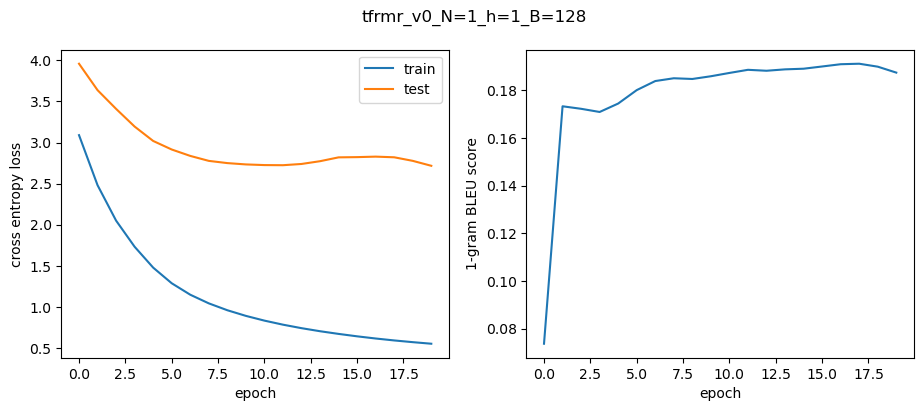

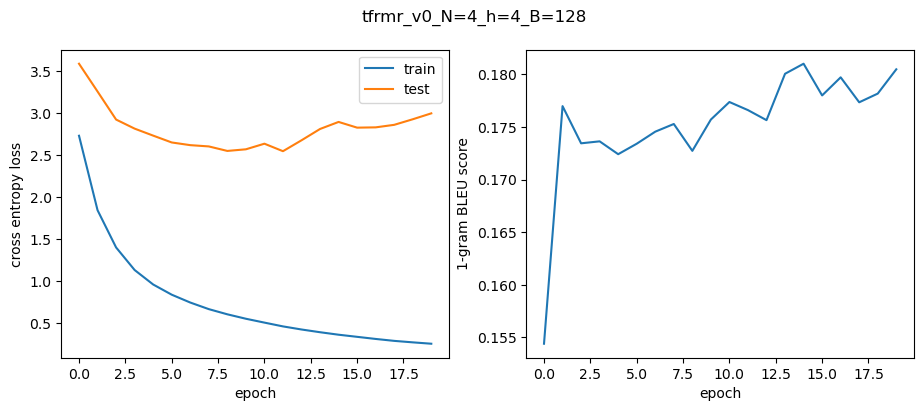

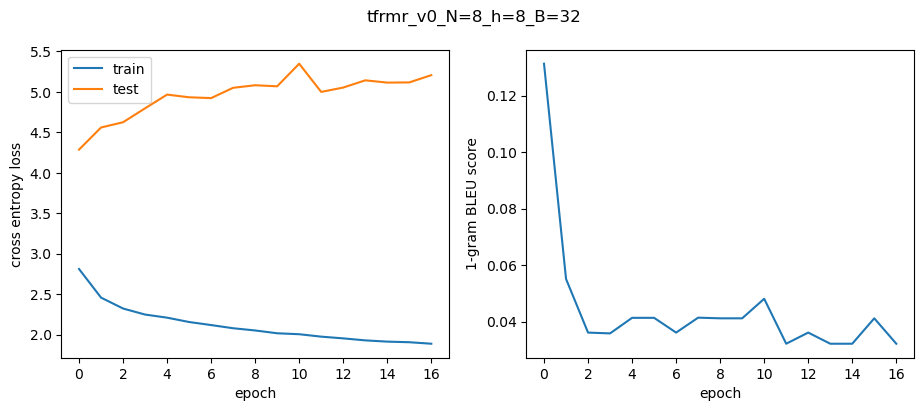

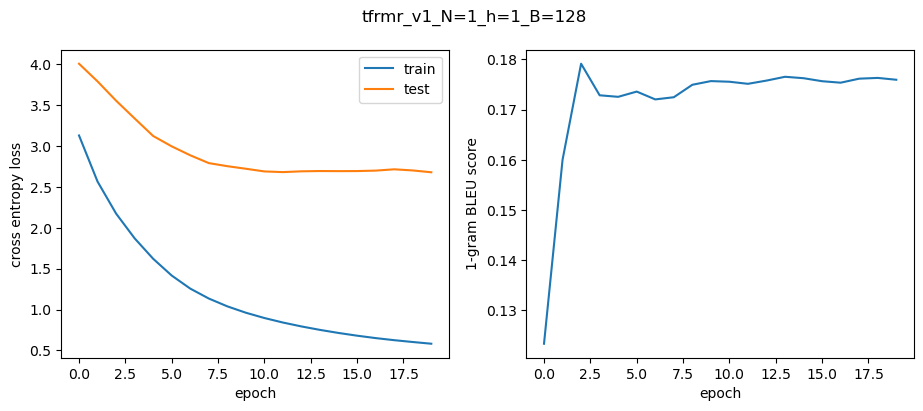

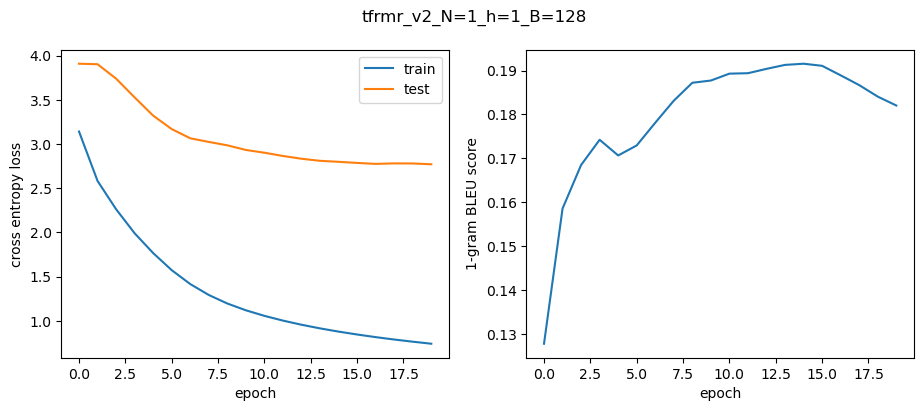

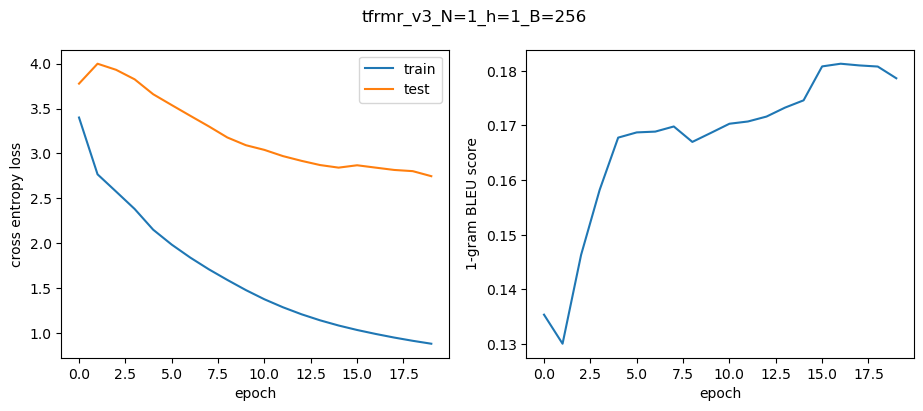

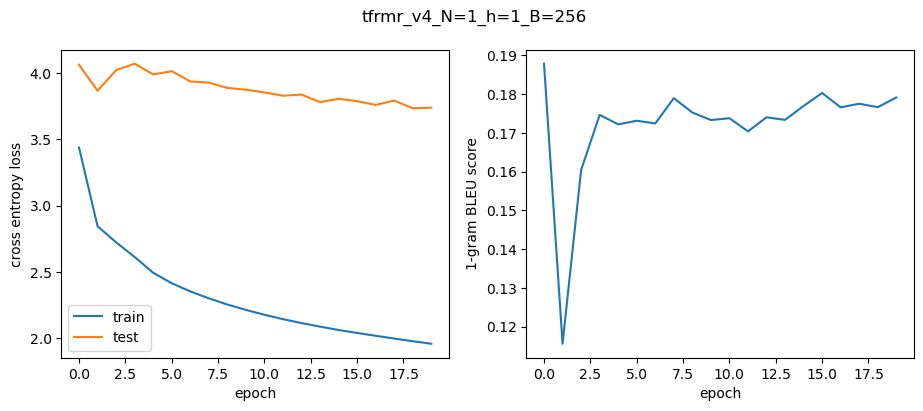

In [3]:
model_names = ["tfrmr_v0_N=1_h=1_B=128", "tfrmr_v0_N=4_h=4_B=128", "tfrmr_v0_N=8_h=8_B=32", "tfrmr_v1_N=1_h=1_B=128", "tfrmr_v2_N=1_h=1_B=128", "tfrmr_v3_N=1_h=1_B=256", "tfrmr_v4_N=1_h=1_B=256"]

for model_name in model_names:
    epoch_train_losses, epoch_test_losses, epoch_bleu_scores = load_metrics(model_name)
    visualize_metrics(model_name, epoch_train_losses, epoch_test_losses, epoch_bleu_scores)

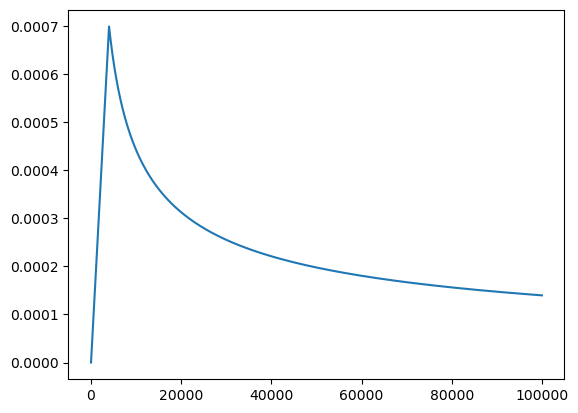

In [7]:
# learning rate defined in paper

def lr(d_m, step_num, warm):
    return d_m**-0.5 * min(step_num**-0.5, step_num*warm**-1.5)

d_m = 512
warm = 4000
step_nums = [i for i in range(1, int(1e5 + 1))]
rates = [lr(d_m, step_num, warm) for step_num in step_nums]

plt.plot(step_nums, rates)
plt.show()